In [3]:
import sys
import numpy as np
import matplotlib.pyplot as plt

from read_yaro import read_mat_multi
# Read LVM file from command line
mousedict = read_mat_multi("/mnt/hifo_scratch1/Yaro/data_for_TE/mtp")

Reading Yaro data from /mnt/hifo_scratch1/Yaro/data_for_TE/mtp/mtp_1/mtp_1_2015_06_18_b
Reading Yaro data from /mnt/hifo_scratch1/Yaro/data_for_TE/mtp/mtp_1/mtp_1_2015_06_19_b
Reading Yaro data from /mnt/hifo_scratch1/Yaro/data_for_TE/mtp/mtp_1/mtp_1_2015_06_22_b
Reading Yaro data from /mnt/hifo_scratch1/Yaro/data_for_TE/mtp/mtp_1/mtp_1_2015_06_23_b
Reading Yaro data from /mnt/hifo_scratch1/Yaro/data_for_TE/mtp/mtp_1/mtp_1_2015_06_24_a
Reading Yaro data from /mnt/hifo_scratch1/Yaro/data_for_TE/mtp/mtp_1/mtp_1_2015_06_25_a
Reading Yaro data from /mnt/hifo_scratch1/Yaro/data_for_TE/mtp/mtp_1/mtp_1_2015_06_26_a
Reading Yaro data from /mnt/hifo_scratch1/Yaro/data_for_TE/mtp/mtp_1/mtp_1_2015_07_14_a
Reading Yaro data from /mnt/hifo_scratch1/Yaro/data_for_TE/mtp/mtp_1/mtp_1_2015_07_15_a
Reading Yaro data from /mnt/hifo_scratch1/Yaro/data_for_TE/mtp/mtp_12/mtp_12_2016_10_26_a
Reading Yaro data from /mnt/hifo_scratch1/Yaro/data_for_TE/mtp/mtp_12/mtp_12_2016_11_01_a
Reading Yaro data from /mnt/

<IPython.core.display.Javascript object>


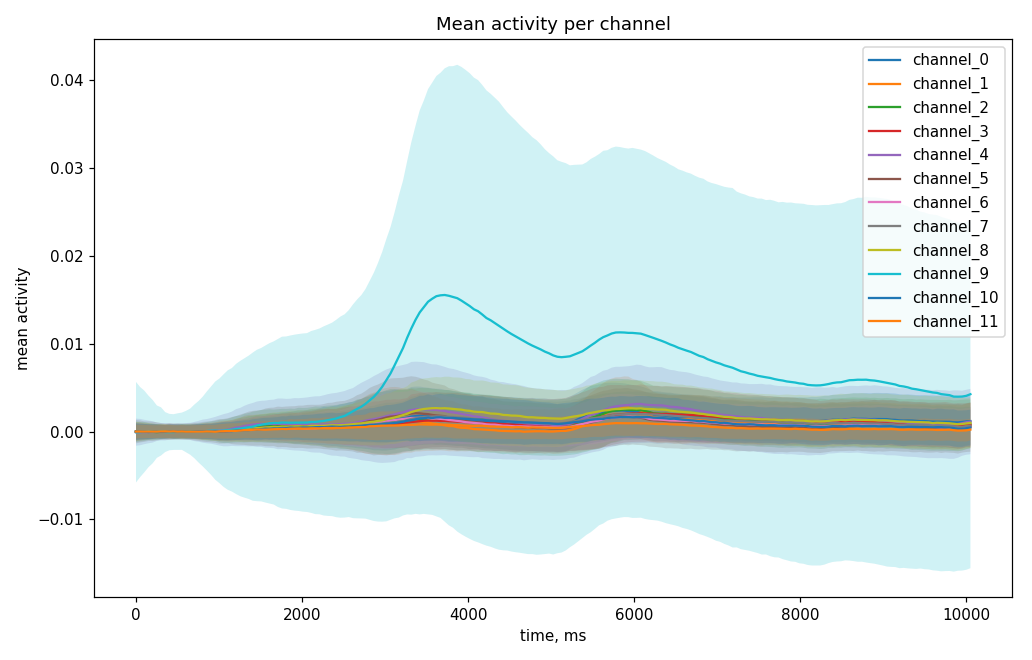

In [26]:
%matplotlib notebook

nTimes = 201
tlst = 50*np.linspace(0, nTimes, nTimes)


# for day_dict in mousedict.values():
#     for data in day_dict.values():
#         print(data['data'].shape)

NTot = 0
nChannels = 12
nTimes = 201
data_mean = np.zeros((nTimes, nChannels))
data_std = np.zeros((nTimes, nChannels))

mousekey = list(mousedict.keys())[0]
for data in mousedict[mousekey].values():
    if data['data'].shape[2] == nChannels:
        NTot += data['data'].shape[0]
        data_mean += np.sum(data['data'], axis=0)

data_mean /= NTot
    
for data in mousedict[mousekey].values():
    if data['data'].shape[2] == nChannels:
        data_std += np.sum((data['data'] - data_mean)**2, axis=0)
    
data_std = np.sqrt(data_std / (NTot - 1))


fig, ax = plt.subplots(figsize=(5,5), tight_layout=True)
for i in range(nChannels):
    ax.plot(tlst, data_mean[:, i], label="channel_"+str(i))
    ax.fill_between(tlst, data_mean[:, i]-data_std[:, i], data_mean[:, i]+data_std[:, i], alpha=0.2)

ax.set_title('Mean activity per channel')
ax.set_ylabel('mean activity')
ax.set_xlabel('time, ms')
ax.legend()
plt.show()